In [5]:
import pandas as pd
user=pd.read_csv("user.csv",encoding='latin-1')
engagement=pd.read_csv("user_engagement.csv",encoding='latin-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [8]:
# put zero for NaN values
user = user.fillna(0)

In [9]:
# peek at the dataframe
user.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [10]:
# what organization has the most users?
# ANSWER: most users belong to organization id: 1 -> 10 except 8
user.org_id.value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [11]:
# who invited most users
user.invited_by_user_id.value_counts().head(10)

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
2354.0       10
10628.0      10
7012.0       10
4803.0       10
Name: invited_by_user_id, dtype: int64

In [13]:
# who are these users who invited the most users , 11770
user[(user['object_id'] == 10741) | (user['object_id'] == 2527) | (user['object_id'] == 2308)| (user['object_id'] == 1525)| (user['object_id'] == 11770)]['name']

1524         Kay Alice
2307       Melo Leonor
2526     Ribeiro Diego
10740    Tennant Piper
11769    Barbosa Tiago
Name: name, dtype: object

In [15]:
# check if there are blank email
print(len(user[user.email == None]))

0


In [16]:
# how many opted in to mailing list
user.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

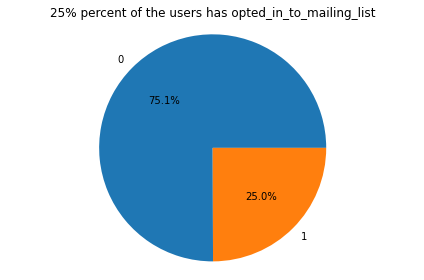

In [18]:
# Create a pie chart

# create dataframe for creation source
import matplotlib.pyplot as plt
df_mail = user.opted_in_to_mailing_list.value_counts()
df_mail = df_mail.reset_index()

# Put parameter values
plt.pie(
    df_mail['opted_in_to_mailing_list'],
    labels=df_mail['index'],
    shadow=False,
    startangle=0,
    autopct='%1.1f%%',
    )

# Add title
plt.title('25% percent of the users has opted_in_to_mailing_list')
plt.axis('equal')

# Display plot 
plt.tight_layout()
plt.show()

In [19]:
# how many enabled for marketing drip
user.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

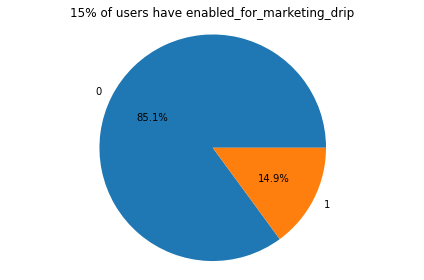

In [22]:
# Create a pie chart

# create dataframe for creation source
import matplotlib.pyplot as plt
df_drip = user.enabled_for_marketing_drip.value_counts()
df_drip = df_drip.reset_index()

# Put parameter values
plt.pie(
    df_drip['enabled_for_marketing_drip'],
    labels=df_drip['index'],
    shadow=False,
    startangle=0,
    autopct='%1.1f%%',
    )

# Add title
plt.title('15% of users have enabled_for_marketing_drip')
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

In [23]:
#creation source distribution
user.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

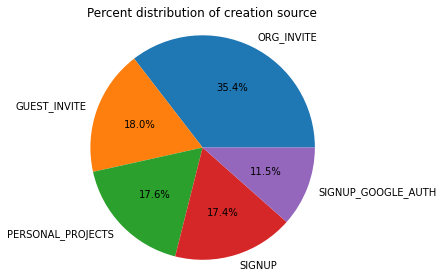

In [24]:
# Create a pie chart
import matplotlib.pyplot as plt
# create dataframe for creation source
df_source = user.creation_source.value_counts()
df_source = df_source.reset_index()

# Put parameter values
plt.pie(
    df_source['creation_source'],
    labels=df_source['index'],
    shadow=False,
    startangle=0,
    autopct='%1.1f%%',
    )

# Add title
plt.title('Percent distribution of creation source')
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

In [25]:
# read file into dataframe
engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [26]:
# top 10 active users (may or may not be adopted users)
engagement.user_id.value_counts().head(10)

3623    606
906     600
1811    593
7590    590
8068    585
9402    581
4022    580
3269    566
9312    547
7210    545
Name: user_id, dtype: int64

In [27]:
# who are these top 3 users?
user[(user['object_id'] == 3623) | (user['object_id'] == 906) | (user['object_id'] == 1811)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
905,906,2012-06-17 22:49:52,Becker Jessika,JessikaBecker@gmail.com,SIGNUP_GOOGLE_AUTH,1.401922e+09,0,0,358,0.0
1810,1811,2012-06-19 16:09:31,Carvalho Eduardo,EduardoCunhaCarvalho@gmail.com,SIGNUP_GOOGLE_AUTH,1.400948e+09,1,1,33,0.0
3622,3623,2012-06-25 14:34:33,Melo VitÃ³ria,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,1.401201e+09,0,0,364,3623.0


In [30]:
# convert string time stamp into datetime
from datetime import date,time
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

# change index to time_stamp column for timegrouper function (later on)
engagement.index = pd.to_datetime(engagement.time_stamp, unit='D')
engagement.head(10)

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2013-12-31 03:45:04,2,1
2014-01-08 03:45:04,2014-01-08 03:45:04,2,1
2014-02-03 03:45:04,2014-02-03 03:45:04,2,1
2014-02-08 03:45:04,2014-02-08 03:45:04,2,1


In [37]:
# only users that have at least 3 sessions in the user_engagement table can potentially be adopted
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from dateutil import parser
user_id_counts = engagement.user_id.value_counts() >= 3
potential_adopted_users = [user_id for user_id in user_id_counts.index if user_id_counts[user_id] == True]

In [44]:
#print (str(engagement['time_stamp'][0:len(engagement)]))
df_engagement = engagement.astype({"time_stamp": str})

In [46]:
# add user to adopted user list if they have 3 active session in a 7 day period
adopted_users = []
for user in potential_adopted_users:
    user_dates = df_engagement[engagement.user_id == user].time_stamp.tolist()
    user_dates = [parser.parse(date) for date in user_dates]

    queue = user_dates[0:3]
    adopted = False
    cur_index = 2

    while adopted == False:
        if ((queue[-1] - queue[0]).days <= 7):
            adopted = True
        else:
            try:
                cur_index += 1
                queue.pop(0)
                queue.append(user_dates[cur_index])
            except:
                break

    if adopted == True:
        adopted_users.append(user)

In [47]:
len(adopted_users)

1656